**Background**

The bank serves small and medium enterprises (SMEs) by providing financial services, including Flexible Credit and Business Loans. These products are essential for helping SMEs manage cash flow, fund growth, and finance operations. However, recent trends indicate a decline in revenues from these credit products. Understanding the factors contributing to this decline is critical to addressing the issue and ensuring the bank remains a trusted partner for SMEs.

**Problem Description**

Management has observed a consistent decrease in revenues generated from Flexible Credits and Business Loans for SMEs. Despite having access to transactional and credit application datasets, insights into the underlying causes of this decline remain limited. Key challenges include:

A lack of visibility into whether credit applications are approved or the loan amounts granted.
Difficulty understanding how customer behavior, economic conditions, and credit policies impact revenue trends.
Identifying potential data gaps that hinder comprehensive analysis.

**Project Objective**

The goal of this project is to analyze the provided datasets to uncover trends and insights related to SME credit products. Specifically, the objectives are:

To provide a detailed overview of credit application and transaction patterns over time.
To calculate and analyze revenues from Flexible Credits and Business Loans.
To identify potential hypotheses for declining revenues and suggest additional data requirements for validation.
To deliver actionable insights that enable the bank to refine its strategies for SME credit products and address revenue challenges effectively.


In [ ]:
#Libraries
import pandas as pd
import sqlite3
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading data
df = pd.read_csv('/content/credit_applications.csv') #File path to change to load the code
df1 = pd.read_csv('/content/customers.csv')

**Wrangle, prepare, cleanse the data**

In [ ]:
df.head(5)

,Unnamed: 0,client_nr,yearmonth,credit_application,nr_credit_applications
0,1,1,201401,0,0
1,2,1,201402,0,0
2,3,1,201403,0,0
3,4,1,201404,0,0
4,5,1,201405,0,0


In [ ]:
df1.head(5)

,Unnamed: 0,client_nr,yearmonth,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG
0,1,1,201401,97,50,6527929,47,7454863,-7914288,25110651,1.0
1,2,1,201402,88,59,3475918,29,1895848,-8448513,25036651,1.0
2,3,1,201403,96,62,31316405,34,20083583,-10347650,18020151,1.0
3,4,1,201404,83,53,18669967,30,1091295,-15385039,13318200,1.0
4,5,1,201405,94,54,2893905,40,2034075,-15682170,2350000,1.0


**Understanding Data Dictionary**

Table: Credit_applications

| Column Name            | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| client_nr              | Unique identifier for the client.                                           |
| yearmonth              | Year and month of the transaction or application in 'YYYY-MM' format.      |
| credit_application     | Indicates whether a credit application was made in the given month (1/0).  |
| nr_credit_applications | Number of credit applications made by the client in the given month.       |


Table: Customers

| Column Name       | Description                                                             |
|-------------------|-------------------------------------------------------------------------|
| client_nr         | Unique identifier for the client.                                       |
| yearmonth         | Year and month of the transaction or application in 'YYYY-MM' format.  |
| total_nr_trx      | Total number of transactions made by the client in the given month.     |
| nr_debit_trx      | Number of debit transactions made by the client in the given month.     |
| volume_debit_trx  | Total volume of debit transactions in the given month.                  |
| nr_credit_trx     | Number of credit transactions made by the client in the given month.    |
| volume_credit_trx | Total volume of credit transactions in the given month.                 |
| min_balance       | Minimum account balance for the client during the given month.          |
| max_balance       | Maximum account balance for the client during the given month.          |
| CRG               | Credit Risk Grade, representing the client's creditworthiness. Scores > 3 are considered risky         |


In [ ]:
# Data Overview
print("Missing values in credit_applications:")
print(df.isnull().sum())

print("\nUnique client IDs in credit_applications:", df['client_nr'].nunique())

# Data Overview
print("\nMissing values in customers:")
print(df1.isnull().sum())

print("Unique client IDs in customers:", df1['client_nr'].nunique())

# Merge Datasets
merged_data = pd.merge(df, df1, on=["client_nr", "yearmonth"], how="inner")

# Check the date range
print("\nDate range in merged dataset:")
print(merged_data['yearmonth'].agg(['min', 'max']))


Missing values in credit_applications:
Unnamed: 0                0
client_nr                 0
yearmonth                 0
credit_application        0
nr_credit_applications    0
dtype: int64

Unique client IDs in credit_applications: 992

Missing values in customers:
Unnamed: 0              0
client_nr               0
yearmonth               0
total_nr_trx            0
nr_debit_trx            0
volume_debit_trx        0
nr_credit_trx           0
volume_credit_trx       0
min_balance             0
max_balance             0
CRG                  5537
dtype: int64
Unique client IDs in customers: 992

Date range in merged dataset:
min    201401
max    201608
Name: yearmonth, dtype: int64


**Mapping all missing values**

CRG has Null score values. These values could either be missing, errors in data entry, unclassified SMEs, or those who have no credit history. We have clients using flexible credit but the CRG is null.

If CRG is null and credit_application indicator is 0 and the maximum shows a big inflow of money, the inflow of money is due to other sources such business revenues, asset sales, transfers from other accounts, investments.

There are clients with a Null crg and indicator 0 but they have a negative minimum balance indicating that they are using flexible credit but it is not reflected in the dataset (either it is missing or there is an error). They could also be customers who are not SMEs but it reflects their personal credit use. The dataset does not clarify if it only contains Business IDs or not.

In [ ]:
merged_data.head(5)

,Unnamed: 0_x,client_nr,yearmonth,credit_application,nr_credit_applications,Unnamed: 0_y,total_nr_trx,nr_debit_trx,volume_debit_trx,nr_credit_trx,volume_credit_trx,min_balance,max_balance,CRG
0,1,1,201401,0,0,1,97,50,6527929,47,7454863,-7914288,25110651,1.0
1,2,1,201402,0,0,2,88,59,3475918,29,1895848,-8448513,25036651,1.0
2,3,1,201403,0,0,3,96,62,31316405,34,20083583,-10347650,18020151,1.0
3,4,1,201404,0,0,4,83,53,18669967,30,1091295,-15385039,13318200,1.0
4,5,1,201405,0,0,5,94,54,2893905,40,2034075,-15682170,2350000,1.0


**Exploratory Data Analysis**

QUESTION 1: Main trends regarding credit history at the bank

**STEP 1: ANALYSING CREDIT TRENDS**

In [ ]:
# Group by client_nr and check max credit_application to summarize behavior
clients_credit_summary = merged_data.groupby('client_nr')['credit_application'].max()

# Total unique clients
total_clients = merged_data['client_nr'].nunique()

# Calculate counts
clients_didnot_apply_for_credit = (clients_credit_summary == 0).sum()
clients_applied_for_credit = (clients_credit_summary == 1).sum()

# Calculate percentages
percentage_applied = (clients_applied_for_credit / total_clients) * 100 if total_clients > 0 else 0

# Clients with No CRG
no_crg = merged_data[merged_data['CRG'].isna()]
clients_no_crg = no_crg['client_nr'].nunique()

# Breakdown for No CRG clients
no_crg_didnot_apply = no_crg.groupby('client_nr')['credit_application'].max()
clients_no_crg_didnot_apply = (no_crg_didnot_apply == 0).sum()
clients_no_crg_applied = (no_crg_didnot_apply == 1).sum()

# Results
print("Summary of Clients:")
print(f"Total Unique Clients: {total_clients}")
print(f"Clients Who Never Applied for Credit: {clients_didnot_apply_for_credit}")
print(f"Clients Who Applied for Credit At Least Once: {clients_applied_for_credit}")
print(f"Percentage of Clients Who Applied for Credit: {percentage_applied:.2f}%")
print(f"Total Clients with No CRG: {clients_no_crg}")
print(f"Clients with No CRG and Did Not Apply for Credit: {clients_no_crg_didnot_apply}")
print(f"Clients with No CRG and Applied for Credit: {clients_no_crg_applied}")

Summary of Clients:
Total Unique Clients: 992
Clients Who Never Applied for Credit: 385
Clients Who Applied for Credit At Least Once: 607
Percentage of Clients Who Applied for Credit: 61.19%
Total Clients with No CRG: 194
Clients with No CRG and Did Not Apply for Credit: 136
Clients with No CRG and Applied for Credit: 58




1.   Clients who never applied for credit: 385 (38.81% of total clients)
  *   Trend Analysis:
      * A significant portion (38.81%) of the client base has not applied for credit at all.
      * This could represent non-credit-seeking clients, or it may indicate clients who are either unaware of credit products or are not eligible for them.
  * Actionable Insights:
      * Opportunity for Targeting: Explore whether this group can be targeted with marketing campaigns or credit offerings to increase engagement.
      * Understanding Client Behavior: Consider why these clients have not applied. Are they low-risk clients, or is there a lack of awareness about credit products?


2.   Clients who applied for credit atleast once: 607 (61.19% of total clients)
  *   Trend Analysis:
      * A majority (61.19%) of clients have shown interest in credit at some point, indicating a potential demand for financial products. However, we need to monitor if there is a declining trend in application for credit over the months and years.
  * Actionable Insights:
      * Focus on Retention and Cross-selling: Since a majority of clients are credit-seeking, there may be opportunities to cross-sell additional credit products, or you can engage this segment in other ways (e.g., by offering loans or credit extensions).
      * Risk Assessment: This group should be closely monitored for trends in credit behavior, as they might be more receptive to new credit offers.


3. Clients with no CRG: 194 (19.55% of total clients)
  *   Trend Analysis:
      * 19.55% of the clients do not have a CRG, which is a notable portion of the client base.
      * Risk Implications: These clients may not be eligible for certain credit products, or they may represent a gap (missing values/ errors) in the data quality. If clients are creditworthy, they should have a CRG.
  * Actionable Insights:
      * Data Completeness: Address the issue of missing CRG for a sizable portion of clients. It needs to be analysed why this is happening and whether this gap is associated with specific segments (e.g., newer clients, certain product lines).
      * Client Classification: Those with no CRG but who have applied for credit should not be overlooked, as they represent potentially underserved customers.


4. Clients with no CRG and did not apply for credit: 136 (13.71% of total clients)
  *   Trend Analysis:
      * A large portion of the clients without a CRG (70.1%) did not apply for credit. These clients may be less engaged with credit products or represent inactive accounts.
  *   Actionable Insights:
      * Review Data Integrity and Client Status: Investigate whether this group consists of dormant clients or those with insufficient data.
      * Target for Engagement: While this group is not currently engaged in credit, they could be part of a reactivation strategy—perhaps via product awareness campaigns or loyalty offers.


5. Clients with no CRG and applied for credit: 58 (5.85% of total clients)
  *   Trend Analysis:
      * Clients in this group have actively sought credit but lack a CRG. This is a critical gap in your data, as these clients’ risk profiles are unclear.
  * Actionable Insights:
      * Investigate Rejections or Delays in CRG Assignment: These clients likely represent rejected credit applications (or pending decisions). It is important to ensure that they are flagged and handled appropriately in the risk assessment process.
      * Risk Management Strategy: You need to address why these clients did not receive a CRG and how to manage the potential risks they represent.
      * Opportunities for Re-engagement: Rejected clients might still be interested in credit or could be offered products tailored to their credit history.




In [ ]:
# Aggregate trends
credit_applications_trends = df.groupby('yearmonth').sum(numeric_only=True).reset_index()
customers_trends = df1.groupby('yearmonth').sum(numeric_only=True).reset_index()

print("\nCustomers Trends by Year-Month:")
print(customers_trends.head())

print("\nCredit Applications Trends by Year-Month:")
print(credit_applications_trends.head())


Customers Trends by Year-Month:
   yearmonth  Unnamed: 0  client_nr  total_nr_trx  nr_debit_trx  \
0     201401    13714695     440578        157136         72280   
1     201402    13718162     440672        143155         67693   
2     201403    13754607     441833        155992         73550   
3     201404    13748829     441619        157304         75373   
4     201405    13770424     442307        159286         72124   

   volume_debit_trx  nr_credit_trx  volume_credit_trx  min_balance  \
0       11129188610          84856        10301174093  -6413359083   
1        9948390956          75462         9125871542  -6150844171   
2       10711279962          82442        10550993204  -6732747780   
3       11056215563          81931        10517328257  -6534999344   
4       10049137550          87162        10648887493  -6384097190   

   max_balance     CRG  
0   4561987920  2523.0  
1   2301467485  2530.0  
2   2008265160  2530.0  
3   3268902254  2523.0  
4   2157447828  25

In [ ]:
credit_trends = merged_data.groupby('yearmonth').agg({
    'credit_application': 'sum',
    'nr_credit_applications': 'sum'
}).reset_index()
print(credit_trends)

    yearmonth  credit_application  nr_credit_applications
0      201401                  57                      66
1      201402                  56                      73
2      201403                  55                      72
3      201404                  53                      82
4      201405                  70                      96
5      201406                  65                      91
6      201407                  70                      89
7      201408                  55                      80
8      201409                  79                      96
9      201410                  58                      87
10     201411                  65                      87
11     201412                  71                      96
12     201501                  68                      86
13     201502                  57                      68
14     201503                  72                      87
15     201504                  63                      80
16     201505 

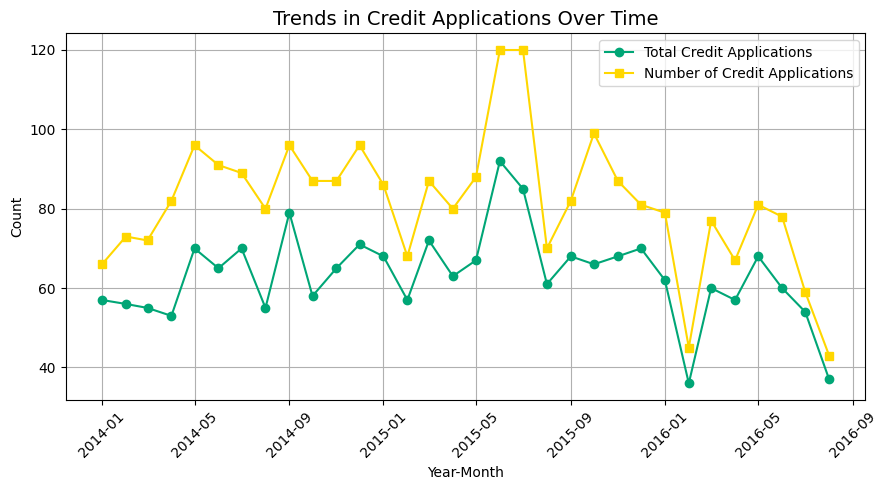

In [ ]:
# Convert 'yearmonth' to a datetime format for better axis handling
credit_trends['yearmonth'] = pd.to_datetime(credit_trends['yearmonth'], format='%Y%m')

# Plot the trends
plt.figure(figsize=(9, 5))

# Plotting credit applications (binary indicator sum)
plt.plot(
    credit_trends['yearmonth'],
    credit_trends['credit_application'],
    label='Total Credit Applications',
    marker='o',
    color='#00A676'
)

# Plotting the number of credit applications
plt.plot(
    credit_trends['yearmonth'],
    credit_trends['nr_credit_applications'],
    label='Number of Credit Applications',
    marker='s',
    color='#FFD700'
)

# Add labels, title, and legend
plt.title('Trends in Credit Applications Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**Summary of findings:**

The number of clients applying for credit and the total credit applications has decreased over time which confirms that loan revenues have been declining for the bank.

**Interpretation:**

  * Credit Demand Hypothesis: Fewer clients applying for credit could indicate that fewer individuals or businesses require loans, signaling reduced demand. We need to look at transaction activity to make further recommendations.

  * Frequency of Applications: A decrease in the total number of credit applications suggests not only fewer clients applying but also existing clients applying less frequently.


**STEP 2: ANALYSING TRANSACTION TRENDS**

In [ ]:
transaction_trends = merged_data.groupby('yearmonth').agg({
    'total_nr_trx': 'sum',
    'nr_debit_trx': 'sum',
    'nr_credit_trx': 'sum',
    'volume_debit_trx': 'sum',
    'volume_credit_trx': 'sum'
}).reset_index()
print(transaction_trends)

    yearmonth  total_nr_trx  nr_debit_trx  nr_credit_trx  volume_debit_trx  \
0      201401        157136         72280          84856       11129188610   
1      201402        143155         67693          75462        9948390956   
2      201403        155992         73550          82442       10711279962   
3      201404        157304         75373          81931       11056215563   
4      201405        159286         72124          87162       10049137550   
5      201406        160448         71723          88725       10542629702   
6      201407        165566         75831          89735       12564109800   
7      201408        146704         65305          81399        9820180853   
8      201409        162445         72362          90083       11330621477   
9      201410        166346         76252          90094       11487907528   
10     201411        145546         66652          78894        9075224691   
11     201412        168013         75601          92412       1

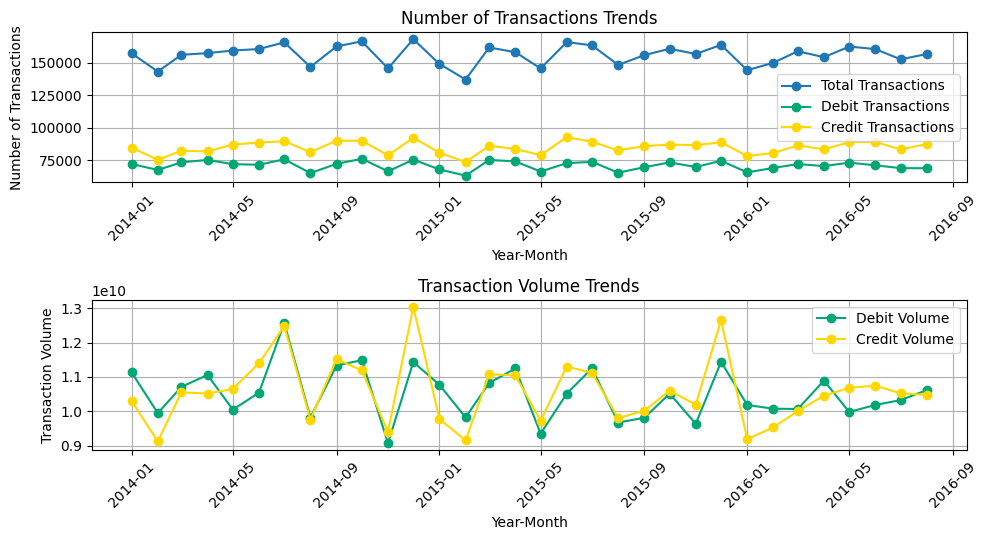

In [ ]:
# Convert 'yearmonth' to a datetime format for better axis handling
transaction_trends['yearmonth'] = pd.to_datetime(transaction_trends['yearmonth'], format='%Y%m')

# Plotting
plt.figure(figsize=(10, 5.5))

# Plot for number of transactions
plt.subplot(2, 1, 1)
plt.plot(transaction_trends['yearmonth'], transaction_trends['total_nr_trx'], label='Total Transactions', marker='o')
plt.plot(transaction_trends['yearmonth'], transaction_trends['nr_debit_trx'], label='Debit Transactions', marker='o', color='#00A676')
plt.plot(transaction_trends['yearmonth'], transaction_trends['nr_credit_trx'], label='Credit Transactions', marker='o', color='#FFD700')
plt.title('Number of Transactions Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Plot for transaction volumes
plt.subplot(2, 1, 2)
plt.plot(transaction_trends['yearmonth'], transaction_trends['volume_debit_trx'], label='Debit Volume', marker='o', color='#00A676')
plt.plot(transaction_trends['yearmonth'], transaction_trends['volume_credit_trx'], label='Credit Volume', marker='o', color='#FFD700')
plt.title('Transaction Volume Trends')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Volume')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
#Transaction trend for credit/debit remains consistent

    yearmonth  debit_percentage  credit_percentage
0  2014-01-01         45.998371          54.001629
1  2014-02-01         47.286508          52.713492
2  2014-03-01         47.149854          52.850146
3  2014-04-01         47.915501          52.084499
4  2014-05-01         45.279560          54.720440
5  2014-06-01         44.701710          55.298290
6  2014-07-01         45.801070          54.198930
7  2014-08-01         44.514805          55.485195
8  2014-09-01         44.545538          55.454462
9  2014-10-01         45.839395          54.160605
10 2014-11-01         45.794457          54.205543
11 2014-12-01         44.997113          55.002887
12 2015-01-01         45.697893          54.302107
13 2015-02-01         46.196275          53.803725
14 2015-03-01         46.631400          53.368600
15 2015-04-01         46.991825          53.008175
16 2015-05-01         45.672770          54.327230
17 2015-06-01         43.972731          56.027269
18 2015-07-01         45.284857

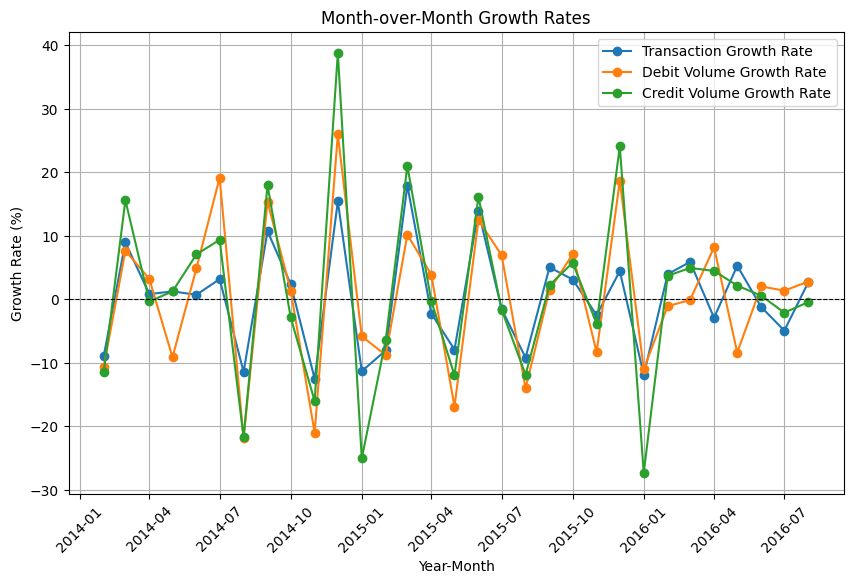

In [ ]:
# Calculate percentage contributions
transaction_trends['debit_percentage'] = (transaction_trends['nr_debit_trx'] / transaction_trends['total_nr_trx']) * 100
transaction_trends['credit_percentage'] = (transaction_trends['nr_credit_trx'] / transaction_trends['total_nr_trx']) * 100

print(transaction_trends[['yearmonth', 'debit_percentage', 'credit_percentage']])

# Calculate month-over-month growth rates
transaction_trends['trx_growth_rate'] = transaction_trends['total_nr_trx'].pct_change() * 100
transaction_trends['volume_debit_growth'] = transaction_trends['volume_debit_trx'].pct_change() * 100
transaction_trends['volume_credit_growth'] = transaction_trends['volume_credit_trx'].pct_change() * 100

print(transaction_trends[['yearmonth', 'trx_growth_rate', 'volume_debit_growth', 'volume_credit_growth']])

# Visualize growth rates
plt.figure(figsize=(10, 6))
plt.plot(transaction_trends['yearmonth'], transaction_trends['trx_growth_rate'], label='Transaction Growth Rate', marker='o')
plt.plot(transaction_trends['yearmonth'], transaction_trends['volume_debit_growth'], label='Debit Volume Growth Rate', marker='o')
plt.plot(transaction_trends['yearmonth'], transaction_trends['volume_credit_growth'], label='Credit Volume Growth Rate', marker='o')
plt.title("Month-over-Month Growth Rates")
plt.xlabel("Year-Month")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid(True)
plt.legend()
plt.show()

**STEP 3: CORRELATING TRANSACTION ACTIVITY AND CREDIT APPLICATIONS**

In [ ]:
# Aggregate transaction volumes and credit applications by yearmonth
correlation_data = merged_data.groupby('yearmonth').agg({
    'total_nr_trx': 'sum',           # Total transactions
    'volume_debit_trx': 'sum',       # Debit transaction volume
    'volume_credit_trx': 'sum',      # Credit transaction volume
    'credit_application': 'sum'      # Total credit applications
}).reset_index()

print(correlation_data.head())

# Correlation calculation
correlation_matrix = correlation_data[['volume_debit_trx', 'volume_credit_trx', 'credit_application']].corr()

print("Correlation Matrix:")
print(correlation_matrix)
#correlation=0.4 b/w volume_credit_trx and credit_applications so a low correlation. Other factors drive loan demand.

   yearmonth  total_nr_trx  volume_debit_trx  volume_credit_trx  \
0     201401        157136       11129188610        10301174093   
1     201402        143155        9948390956         9125871542   
2     201403        155992       10711279962        10550993204   
3     201404        157304       11056215563        10517328257   
4     201405        159286       10049137550        10648887493   

   credit_application  
0                  57  
1                  56  
2                  55  
3                  53  
4                  70  
Correlation Matrix:
                    volume_debit_trx  volume_credit_trx  credit_application
volume_debit_trx            1.000000           0.768148            0.196028
volume_credit_trx           0.768148           1.000000            0.439996
credit_application          0.196028           0.439996            1.000000


**CORRELATION MATRIX**

|                     | volume_debit_trx | volume_credit_trx | credit_application |
|---------------------|------------------|-------------------|--------------------|
| volume_debit_trx     | 1.000000         | 0.768148          | 0.196028           |
| volume_credit_trx    | 0.768148         | 1.000000          | 0.439996           |
| credit_application   | 0.196028         | 0.439996          | 1.000000           |

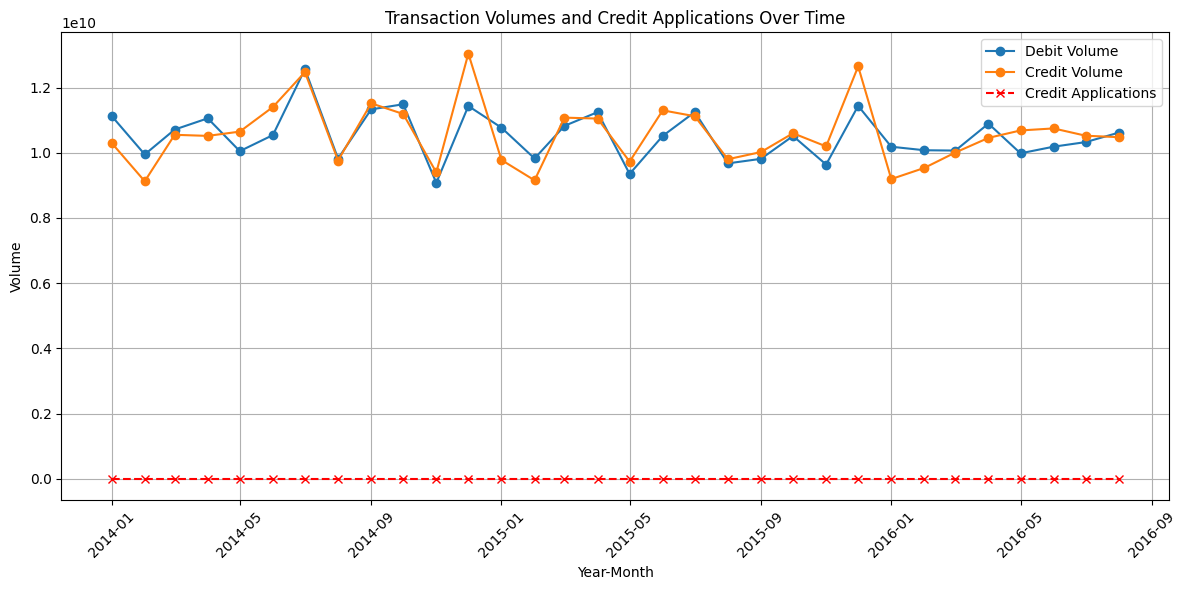

In [ ]:
# Convert 'yearmonth' to a datetime format for better axis handling
correlation_data['yearmonth'] = pd.to_datetime(correlation_data['yearmonth'], format='%Y%m')

plt.figure(figsize=(12, 6))

# Plot Debit and Credit Volumes
plt.plot(correlation_data['yearmonth'], correlation_data['volume_debit_trx'], label='Debit Volume', marker='o')
plt.plot(correlation_data['yearmonth'], correlation_data['volume_credit_trx'], label='Credit Volume', marker='o')

# Plot Credit Applications
plt.plot(correlation_data['yearmonth'], correlation_data['credit_application'], label='Credit Applications', marker='x', linestyle='--', color='red')

plt.title('Transaction Volumes and Credit Applications Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm

# Prepare independent and dependent variables
X = correlation_data[['volume_debit_trx', 'volume_credit_trx']]
X = sm.add_constant(X)  # Add constant for regression
y = correlation_data['credit_application']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())
#Credit transaction volume likely has an impact on loan demand.
#This could imply that clients engaging in credit-related activities (e.g., borrowing, overdrafts) are more inclined to apply for loans.

                            OLS Regression Results                            
Dep. Variable:     credit_application   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     4.648
Date:                Sun, 19 Jan 2025   Prob (F-statistic):             0.0177
Time:                        19:37:20   Log-Likelihood:                -117.90
No. Observations:                  32   AIC:                             241.8
Df Residuals:                      29   BIC:                             246.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                31.5559     25.54

**Summary of findings:**

The observation that credit and debit transaction volumes remain constant over the same time period as the decrease in credit applications suggests a nuanced dynamic in client behavior. Correlation analysis and a coefficient of 0.43 indicaates a low correlation between credit_applications and number of credit transactions. Other factors drive loan demand.

**Interpretation:**

  * Unchanged Client Activity

  The stability in transaction volumes indicates that clients continue to actively use their accounts for financial operations, such as:
    * Day-to-day expenses (debit transactions).
    * Loan repayments or business-related expenses (credit transactions).
  * Decoupling of Credit Demand and General Transactions
    * The reduction in credit applications appears to be independent of the clients’ ongoing transaction behavior.
    * This suggests that while clients are still financially active, they may be avoiding new credit or loans.

**STEP 4: ANALYSING LOAN PRODUCTS AND THEIR BALANCES**

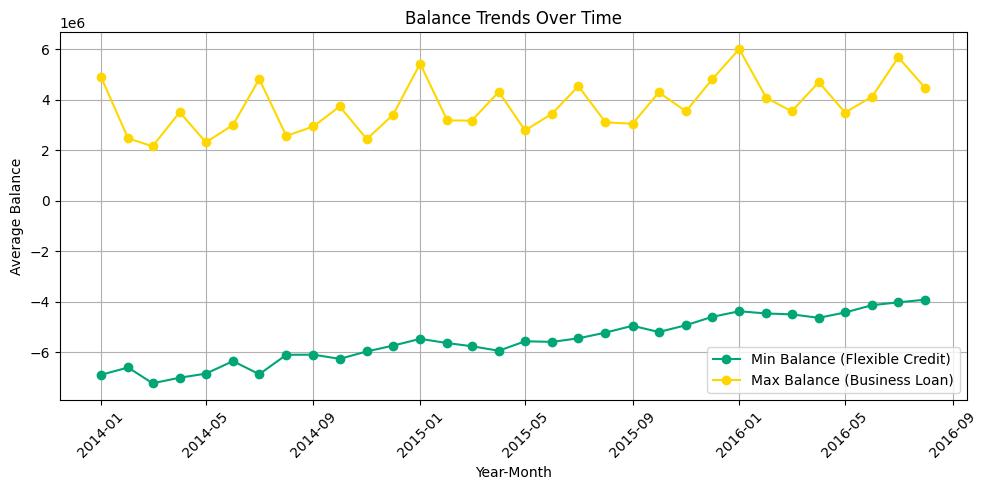

In [ ]:
# Aggregate balance trends
balance_trends = merged_data.groupby('yearmonth').agg({
    'min_balance': 'mean',
    'max_balance': 'mean'
}).reset_index()

# Convert 'yearmonth' to a datetime format for better axis handling
balance_trends['yearmonth'] = pd.to_datetime(balance_trends['yearmonth'], format='%Y%m')

# Plot balance trends
plt.figure(figsize=(10, 5))
plt.plot(balance_trends['yearmonth'], balance_trends['min_balance'], label='Min Balance (Flexible Credit)', marker='o', color='#00A676')
plt.plot(balance_trends['yearmonth'], balance_trends['max_balance'], label='Max Balance (Business Loan)', marker='o', color='#FFD700')

plt.title('Balance Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Balance')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
#Decreasing trend for minimum balance, it could indicate reduced reliance on overdrafts
#perhaps due to improved financial health or reduced borrowing.
#For max balance, the trend seems inconclusive, need more data.

In [ ]:
# Step 1: Calculate the average balance per month
average_balance = merged_data.groupby('yearmonth')['min_balance'].mean().reset_index()
average_balance.rename(columns={'min_balance': 'avg_balance'}, inplace=True)

# Step 2: Filter for negative balances
avg_balance_trends = average_balance[average_balance['avg_balance'] < 0]

# Convert 'yearmonth' to datetime for consistent calculations
merged_data['yearmonth'] = pd.to_datetime(merged_data['yearmonth'], format='%Y%m')

# Step 1: Filter out denied applications (CRG >= 4 are denied)
eligible_data = merged_data[merged_data['CRG'] < 4].copy()

# Step 2: Calculate balances 3 and 4 months after the application
eligible_data['max_balance_3_months'] = eligible_data.groupby('client_nr')['max_balance'].shift(-3)
eligible_data['max_balance_4_months'] = eligible_data.groupby('client_nr')['max_balance'].shift(-4)

# Step 3: Calculate balance increase
eligible_data['balance_increase'] = eligible_data['max_balance_4_months'] - eligible_data['max_balance_3_months']

# Step 4: Identify granted loans (balance increase > 0)
eligible_data['loan_granted'] = eligible_data['balance_increase'].apply(lambda x: x if x > 0 else 0)

# Aggregate total loan amounts per month
loan_trends = eligible_data.groupby('yearmonth').agg({
    'loan_granted': 'sum'  # Total loan amounts per month
}).reset_index()

# Ensure datetime format for visualization
loan_trends['yearmonth'] = pd.to_datetime(loan_trends['yearmonth'])



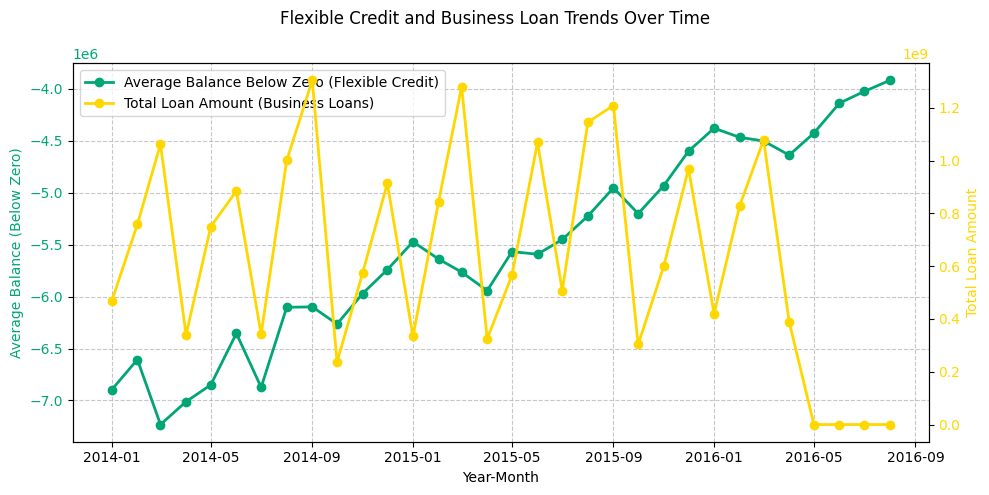

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Flexible Credit (Average Balance Below Zero)
ax1.plot(avg_balance_trends['yearmonth'], avg_balance_trends['avg_balance'],
         label='Average Balance Below Zero (Flexible Credit)', color='#00A676', marker='o', linewidth=2)
ax1.set_ylabel('Average Balance (Below Zero)', color='#00A676')
ax1.tick_params(axis='y', labelcolor='#00A676')
ax1.set_xlabel('Year-Month')

# Business Loans (Total Loan Amount)
ax2 = ax1.twinx()
ax2.plot(loan_trends['yearmonth'], loan_trends['loan_granted'],
         label='Total Loan Amount (Business Loans)', color='#FFD700', marker='o', linewidth=2)
ax2.set_ylabel('Total Loan Amount', color='#FFD700')
ax2.tick_params(axis='y', labelcolor='#FFD700')

# Title, Grid, and Legend
fig.suptitle('Flexible Credit and Business Loan Trends Over Time')
ax1.grid(visible=True, linestyle='--', alpha=0.7)

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Summary of findings:**

The minimum balance improves overtime which indicates less reliance on credit and may correlate with reduced credit applications.

The maximum balance trend seems inconclusive and requires a bigger dataset.

Improving minimum balances indicates less reliance on Flexible Credit. The clients might not see Flexible Credit as an appealing product anymore. The interest rate terms for Flexible Credit could be unfavourable but we need additional data. Competition might be providing more favourable terms. Economic factors and risk aversion also influence credit demand and demand for the two products.

**STEP 5: SEGMENT ANALYSIS - SEGMENT BY CRG, CRG AND PRODUCT**

In [ ]:
#Segment Analysis
crg_trends = merged_data.groupby('CRG').agg({
    'credit_application': 'sum',
    'nr_credit_applications': 'sum'
}).reset_index()
crg_trends['application_rate'] = crg_trends['credit_application'] / crg_trends['nr_credit_applications']
print(crg_trends)
#We have no clients with CRG 6 - Is it missing data?

   CRG  credit_application  nr_credit_applications  application_rate
0  1.0                 149                     186          0.801075
1  2.0                 305                     415          0.734940
2  3.0                 607                     756          0.802910
3  4.0                 232                     290          0.800000
4  5.0                 111                     134          0.828358
5  7.0                 479                     614          0.780130


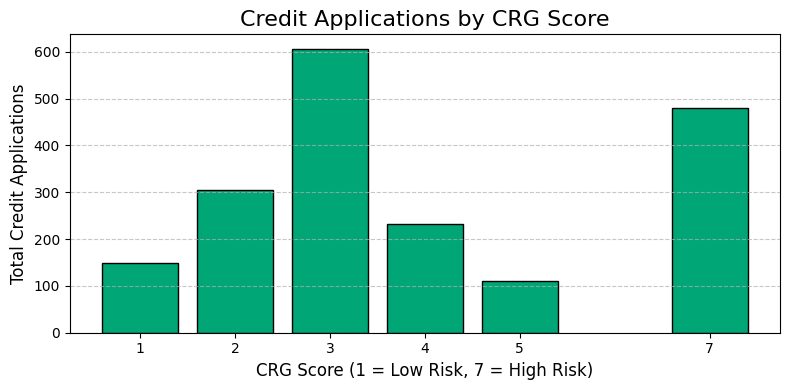

In [ ]:
# Plot CRG scores vs Credit Applications
plt.figure(figsize=(8, 4))
plt.bar(crg_trends['CRG'], crg_trends['credit_application'], color='#00A676', edgecolor='black')

# Adding titles and labels
plt.title('Credit Applications by CRG Score', fontsize=16)
plt.xlabel('CRG Score (1 = Low Risk, 7 = High Risk)', fontsize=12)
plt.ylabel('Total Credit Applications', fontsize=12)
plt.xticks(crg_trends['CRG'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Correlation for SMEs
low_risk = merged_data[merged_data['CRG'].between(1, 3, inclusive="both")]
hight_risk = merged_data[merged_data['CRG'] > 3]
missing_crg_data = merged_data[merged_data['CRG'].isnull()]

# Grouping clients by risk categories and counting unique clients
low_risk_clients = low_risk['client_nr'].nunique()
high_risk_clients = hight_risk['client_nr'].nunique()
missing_crg_clients = missing_crg_data['client_nr'].nunique()

# Creating a summary DataFrame
risk_category_summary = pd.DataFrame({
    'CRG_Category': ['Low Risk (1-3)', 'High Risk (>3)', 'Missing CRG'],
    'Unique Clients': [low_risk_clients, high_risk_clients, missing_crg_clients]
})

# Aggregating credit applications by risk categories
low_risk_credit_apps = low_risk['credit_application'].sum()
high_risk_credit_apps = hight_risk['credit_application'].sum()
missing_crg_credit_apps = missing_crg_data['credit_application'].sum()

# Updating the summary DataFrame to include credit applications
risk_category_summary['Credit Applications'] = [
    low_risk_credit_apps,
    high_risk_credit_apps,
    missing_crg_credit_apps
]

# Displaying the updated summary
print(risk_category_summary)

     CRG_Category  Unique Clients  Credit Applications
0  Low Risk (1-3)             567                 1061
1  High Risk (>3)             231                  822
2     Missing CRG             194                  142


Credit Demand by Risk Tier:

Lower CRG Scores (1–3): Likely represent less risky clients. If these groups show a higher number of credit applications (credit_application), it suggests that safer clients are more engaged with credit offerings.

Higher CRG Scores (5–7): Represent riskier clients. A lower demand in these groups may indicate barriers to access, stricter credit policies, or reduced interest in borrowing due to financial instability.

Credit Risk vs. Credit Demand

A declining trend in applications across all CRG groups may indicate a general decrease in credit demand.

However, if lower CRG clients (safer clients) show a steeper decline in applications, it could signify a shift in market dynamics or product appeal.


In [ ]:
# Trend Analysis by CRG and yearmonth
crg_yearmonth_trends = merged_data.groupby(['CRG', 'yearmonth']).agg({
    'credit_application': 'sum',
    'nr_credit_applications': 'sum'
}).reset_index()

print(crg_yearmonth_trends)

     CRG  yearmonth  credit_application  nr_credit_applications
0    1.0     201401                   5                       5
1    1.0     201402                   5                       5
2    1.0     201403                   7                       9
3    1.0     201404                   2                       3
4    1.0     201405                   8                      11
..   ...        ...                 ...                     ...
187  7.0     201604                  14                      16
188  7.0     201605                  16                      18
189  7.0     201606                  10                      18
190  7.0     201607                  14                      17
191  7.0     201608                  12                      14

[192 rows x 4 columns]


In [ ]:
# Grouping data by yearmonth for low risk
low_risk_by_month = low_risk.groupby('yearmonth').agg({
    'credit_application': 'sum',
    'client_nr': 'nunique',  # Unique clients
    'min_balance': 'mean',
    'max_balance': 'mean'
}).rename(columns={'client_nr': 'Unique Clients'})

# Grouping data by yearmonth for high risk
high_risk_by_month = hight_risk.groupby('yearmonth').agg({
    'credit_application': 'sum',
    'client_nr': 'nunique',  # Unique clients
    'min_balance': 'mean',
    'max_balance': 'mean'
}).rename(columns={'client_nr': 'Unique Clients'})

missing_crg_by_month = missing_crg_data.groupby('yearmonth').agg({
    'credit_application': 'sum',
    'client_nr': 'nunique'  # Unique clients
}).rename(columns={'client_nr': 'Unique Clients'})

# Adding a risk category column for plotting
low_risk_by_month['CRG_Category'] = 'Low Risk (1-3)'
high_risk_by_month['CRG_Category'] = 'High Risk (>3)'
missing_crg_by_month['CRG_Category'] = 'Missing CRG'

# Combining the data
risk_category_trends = pd.concat([low_risk_by_month, high_risk_by_month, missing_crg_by_month]).reset_index()

<Figure size 900x500 with 0 Axes>

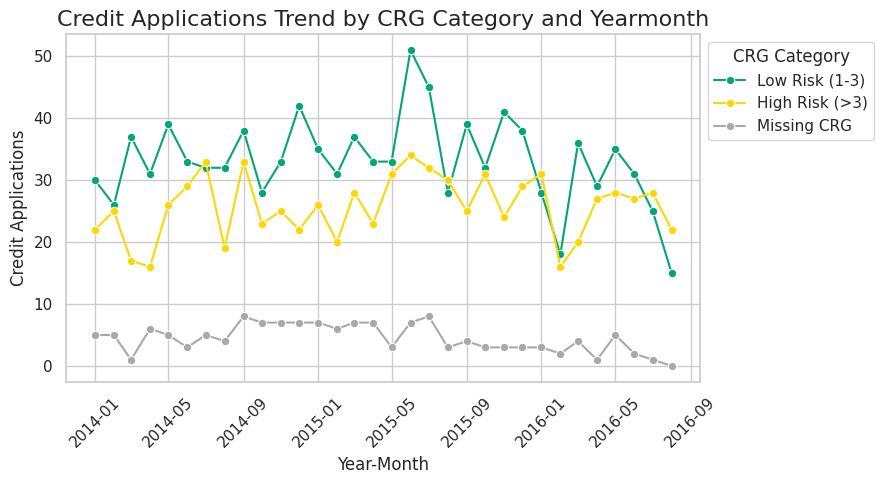

In [ ]:
# Convert 'yearmonth' to a datetime format for better axis handling
risk_category_trends['yearmonth'] = pd.to_datetime(risk_category_trends['yearmonth'], format='%Y%m')

risk_palette = {
    'Low Risk (1-3)': '#00A676',  # green
    'High Risk (>3)': '#FFD700', #  yellow
    'Missing CRG': '#A9A9A9'
}

# Set the plot style
sns.set(style="whitegrid")

# Create a line plot for trends by CRG category
plt.figure(figsize=(9, 5))

# Create a separate line plot for credit applications
plt.figure(figsize=(9, 5))

sns.lineplot(
    data=risk_category_trends,
    x='yearmonth',
    y='credit_application',
    hue='CRG_Category',
    marker='o',
    linestyle='-',
    palette=risk_palette
)

# Customize the plot
plt.title('Credit Applications Trend by CRG Category and Yearmonth', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Credit Applications', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='CRG Category', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()
plt.show()

Credit demand across the two segments i.e low-risk and high-risk clients is declining which means that reduction in credit demand is not confined to a particular risk segment.

**Insights:**

**Broad Decline in Credit Demand:**

The decline across all CRG groups, including low-risk, high-risk, and null CRG categories, points to a general hesitancy or reduced need for credit among clients.

**Economic or Market Factors:**

External factors, such as economic slowdowns, increased interest rates, or stricter lending policies, may be influencing all segments equally.
SMEs might be finding alternative funding options or are operating more conservatively, leading to fewer credit applications.

**Impact of Internal Policies:**

If the organization has tightened credit evaluation processes or introduced stricter risk assessment measures, this might have deterred applicants across the board.

**Client Behavior:**

A general trend of improving minimum balances could suggest that clients are managing their finances better, potentially reducing the need for flexible credit products.

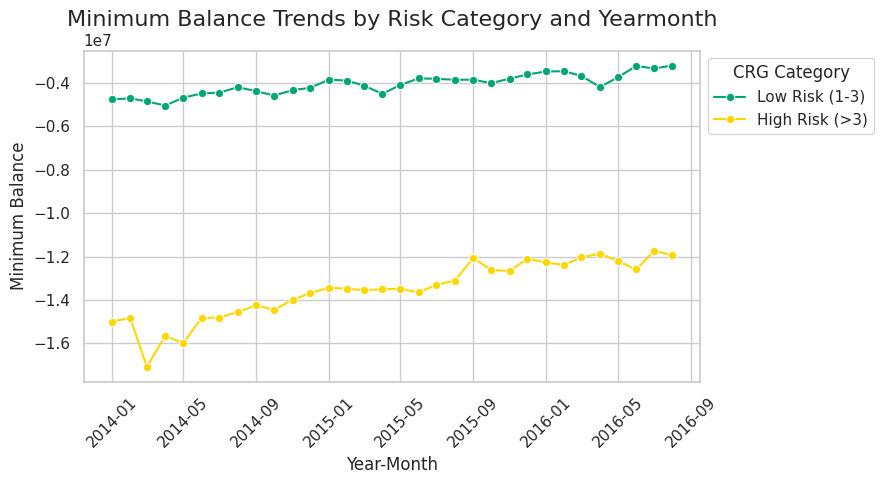

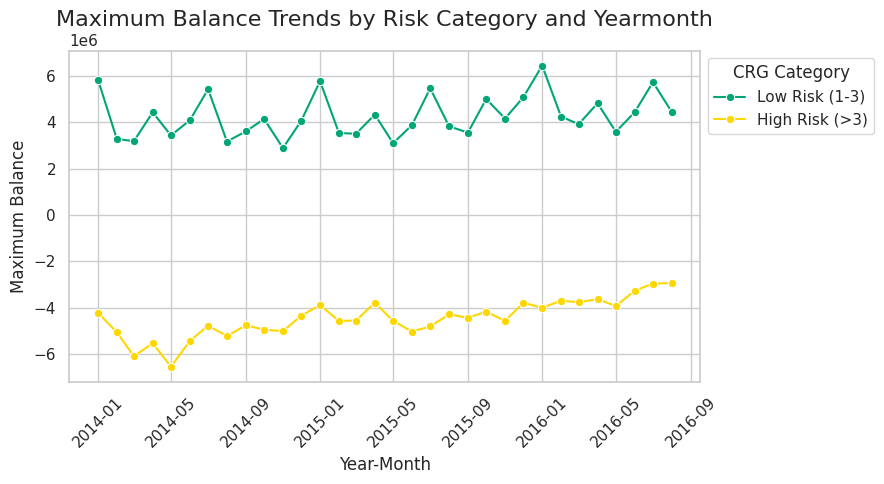

In [ ]:
# Combining the data
risk_category_trends = pd.concat([low_risk_by_month, high_risk_by_month]).reset_index()

# Convert 'yearmonth' to a datetime format for better axis handling
risk_category_trends['yearmonth'] = pd.to_datetime(risk_category_trends['yearmonth'], format='%Y%m')

risk_palette = {
    'Low Risk (1-3)': '#00A676',  # green
    'High Risk (>3)': '#FFD700', #  yellow
    'Missing CRG': '#A9A9A9'
}

# Set the plot style
sns.set(style="whitegrid")

# Plot Minimum Balance Trends
plt.figure(figsize=(9, 5))
sns.lineplot(
    data=risk_category_trends,
    x='yearmonth',
    y='min_balance',
    hue='CRG_Category',
    marker='o',
    linestyle='-',
    palette=risk_palette
)

# Customize the plot
plt.title('Minimum Balance Trends by Risk Category and Yearmonth', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Minimum Balance', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='CRG Category', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()
plt.show()

# Plot Maximum Balance Trends
plt.figure(figsize=(9, 5))
sns.lineplot(
    data=risk_category_trends,
    x='yearmonth',
    y='max_balance',
    hue='CRG_Category',
    marker='o',
    linestyle='-',
    palette=risk_palette
)

# Customize the plot
plt.title('Maximum Balance Trends by Risk Category and Yearmonth', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Maximum Balance', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='CRG Category', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()
plt.show()

Minimum and maximum balances improved across both segments.

**Segment-Specific Observations:**

**Low-Risk Clients:**

Improved balances in this segment align with their generally stable financial behavior. These clients may prefer self-financing over borrowing unless they see clear benefits from credit products. They could also be relying on other options such as other banks, other financing solutions, savings, funds from family members etc.

**High-Risk Clients:**

Improved balances here are noteworthy as they might indicate reduced financial strain or successful recovery efforts. This could signal an opportunity to reevaluate lending strategies for this group.

**Implications:**

We need to analyse the credit demand in Netherlands to provide further insights as well as the Economic conditions. If the demand is declining across NL, we need to consider the recovery period and predictive modelling if the demand for the product will recover or not. If not, then introduce other products to generate revenue.

In [ ]:
# Correlation for SMEs
sme_data = merged_data[merged_data['CRG'].between(1, 3, inclusive="both")]
non_sme_data = merged_data[merged_data['CRG'] > 3]
missing_crg_data = merged_data[merged_data['CRG'].isnull()]

sme_trends = sme_data.groupby('yearmonth').agg({
    'volume_credit_trx': 'sum',
    'credit_application': 'sum'
}).reset_index()

non_sme_trends = non_sme_data.groupby('yearmonth').agg({
    'volume_credit_trx': 'sum',
    'credit_application': 'sum'
}).reset_index()

sme_corr = sme_trends[['volume_credit_trx', 'credit_application']].corr()
print("SME Correlation:\n", sme_corr)

# Correlation for Non-SMEs
non_sme_corr = non_sme_trends[['volume_credit_trx', 'credit_application']].corr()
print("Non-SME Correlation:\n", non_sme_corr)


SME Correlation:
                     volume_credit_trx  credit_application
volume_credit_trx            1.000000            0.335556
credit_application           0.335556            1.000000
Non-SME Correlation:
                     volume_credit_trx  credit_application
volume_credit_trx            1.000000            0.140718
credit_application           0.140718            1.000000


**Summary Findings from Segment Analysis:**

We analysed credit demand across two segments i.e low-risk and high-risk. There is a general decline in credit demand across all CRG groups.

Additionally we also analysed credit demand for low and high-risk clients for the two products. The minimum and maximum balances are improving across the months for both segments indicating that there is less appeal for these products in general. The bank can explore opportunities for other products, monitor external drivers, do predictive modelling if/ when the demand will recover for credit, explore alternative revenue streams.

QUESTION 2: A Flexible Credit allows clients to maintain a negative balance. Assume that, for each month with
an average balance below zero, clients pay interest of 1% of the average negative balance. What are
total revenues per month from Flexible Credits?  

In [ ]:
# Step 1: Calculate the average balance per month
average_balance = merged_data.groupby('yearmonth')['min_balance'].mean().reset_index()
average_balance.rename(columns={'min_balance': 'avg_balance'}, inplace=True)

# Step 2: Filter for negative balances
negative_balances = average_balance[average_balance['avg_balance'] < 0]

# Step 3: Calculate monthly revenue
negative_balances['monthly_revenue'] = -0.01 * negative_balances['avg_balance']  # Revenue from negative balances

# Step 4: Add a Total Revenue Column (if needed)
total_revenue_per_month = negative_balances[['yearmonth', 'monthly_revenue']]

# Round the 'monthly_revenue' column to 2 decimal places
#total_revenue_per_month['monthly_revenue'] = total_revenue_per_month['monthly_revenue'].round(2)

# Display the total revenue per month
print(total_revenue_per_month)


    yearmonth  monthly_revenue
0  2014-01-01     68960.850355
1  2014-02-01     66067.069506
2  2014-03-01     72317.376799
3  2014-04-01     70118.018712
4  2014-05-01     68498.896888
5  2014-06-01     63543.865622
6  2014-07-01     68735.698600
7  2014-08-01     61029.879476
8  2014-09-01     60990.878802
9  2014-10-01     62640.320244
10 2014-11-01     59707.708667
11 2014-12-01     57408.987031
12 2015-01-01     54723.663557
13 2015-02-01     56384.294088
14 2015-03-01     57644.747276
15 2015-04-01     59431.506791
16 2015-05-01     55673.814111
17 2015-06-01     55923.949586
18 2015-07-01     54504.022053
19 2015-08-01     52248.924995
20 2015-09-01     49535.475713
21 2015-10-01     52011.425037
22 2015-11-01     49321.156362
23 2015-12-01     46004.407972
24 2016-01-01     43787.294528
25 2016-02-01     44669.757125
26 2016-03-01     45018.714888
27 2016-04-01     46382.461745
28 2016-05-01     44259.125155
29 2016-06-01     41374.700584
30 2016-07-01     40249.528640
31 2016-

| Year-Month   | Monthly Revenue  |
|--------------|------------------|
| 2014-01   | 68,960.85       |
| 2014-02   | 66,067.07       |
| 2014-03   | 72,317.38       |
| 2014-04   | 70,118.02       |
| 2014-05   | 68,498.90       |
| 2014-06   | 63,543.87       |
| 2014-07   | 68,735.70       |
| 2014-08   | 61,029.88       |
| 2014-09   | 60,990.88       |
| 2014-10   | 62,640.32       |
| 2014-11   | 59,707.71       |
| 2014-12   | 57,408.99       |
| 2015-01   | 54,723.66       |
| 2015-02   | 56,384.29       |
| 2015-03   | 57,644.75       |
| 2015-04   | 59,431.51       |
| 2015-05   | 55,673.81       |
| 2015-06   | 55,923.95       |
| 2015-07   | 54,504.02       |
| 2015-08   | 52,248.92       |
| 2015-09   | 49,535.48       |
| 2015-10   | 52,011.43       |
| 2015-11   | 49,321.16       |
| 2015-12   | 46,004.41       |
| 2016-01   | 43,787.29       |
| 2016-02   | 44,669.76       |
| 2016-03   | 45,018.71       |
| 2016-04   | 46,382.46       |
| 2016-05   | 44,259.13       |
| 2016-06   | 41,374.70       |
| 2016-07   | 40,249.53       |
| 2016-08   | 39,185.08       |


**Summary of findings:**

The declining revenues combined with all the other trends observed reinforces that demand for credit is waning.

**Implications for Strategy:**

1. Re-evaluate Product Positioning:

  Conduct a detailed analysis of the flexible credit product to understand its declining appeal. Consider revisiting terms, features, or pricing.

2. Explore Product Diversification:

  Introduce new credit products tailored to current client needs, such as structured long-term loans, revolving credit facilities, or investment loans.

3. Focus on Client Retention:

  Offer value-added services like financial advisory or cash flow management tools to retain clients who might otherwise leave for competitors.

4. Assess Revenue Trends by Segments:

  Break down flexible credit revenues by client segments (low-risk, high-risk, and null CRG). Understanding segment-specific trends can guide targeted marketing or product tweaks.

5. Investigate External Drivers:

  Correlate the decline in revenues with external factors like market trends, economic indicators, or competition to better anticipate future changes.


BONUS QUESTION:

What are total revenues per month from Business Loans? Compare to your results of Q3.   
• Clients whose loan applications are granted receive the money 4 months afterwards (e.g. a client who
successfully applied in 201506 will have the money added to their balance in 201510).  
• Applications from clients with a CRG of 4 or higher are all denied.  
• We have no data on whether or not the loan was granted, nor for what amount. Assume that clients with
a balance increase between 3 and 4 months after their application where granted a loan equal to the
balance increase (e.g. a client who applied in 201506, had a 201509 balance of 10k and a 201510 balance of
15k must have received a loan for 5k.)   
• Assume a total revenue of 25% of the granted loan amount (note that this is a one-time revenue, unlike
the monthly revenue you calculate for Flexible Credits).  

In [ ]:
# Convert 'yearmonth' to datetime for easier calculations
merged_data['yearmonth'] = pd.to_datetime(merged_data['yearmonth'], format='%Y%m')

# Step 1: Filter out denied applications
eligible_data = merged_data[merged_data['CRG'] < 4]

# Step 2: Calculate balance difference 3 to 4 months after application
# Shift balances to calculate future values
eligible_data = eligible_data.copy()  # Make a copy to avoid the warning
eligible_data['max_balance_3_months'] = eligible_data.groupby('client_nr')['max_balance'].shift(-3)
eligible_data['max_balance_4_months'] = eligible_data.groupby('client_nr')['max_balance'].shift(-4)

# Calculate balance increase
eligible_data['balance_increase'] = eligible_data['max_balance_4_months'] - eligible_data['max_balance_3_months']

# Identify granted loans (balance increase > 0)
eligible_data['loan_granted'] = eligible_data['balance_increase'].apply(lambda x: x if x > 0 else 0)

# Step 3: Calculate revenues
eligible_data['revenue'] = eligible_data['loan_granted'] * 0.25

# Step 4: Aggregate total revenues per month
# Adjust the application date to the loan granting date (4 months later)
eligible_data['loan_grant_date'] = eligible_data['yearmonth'] + pd.DateOffset(months=4)

# Aggregate by loan granting month
total_revenues = (
    eligible_data.groupby(eligible_data['loan_grant_date'].dt.to_period('M'))
    .agg({'revenue': 'sum'})
    .reset_index()
)
total_revenues.rename(columns={'loan_grant_date': 'yearmonth'}, inplace=True)

# Convert yearmonth back to a readable format
total_revenues['yearmonth'] = total_revenues['yearmonth'].dt.strftime('%Y-%m')

# Display results
print(total_revenues)

   yearmonth       revenue
0    2014-05  1.170057e+08
1    2014-06  1.896447e+08
2    2014-07  2.656372e+08
3    2014-08  8.493354e+07
4    2014-09  1.875117e+08
5    2014-10  2.212211e+08
6    2014-11  8.562062e+07
7    2014-12  2.501632e+08
8    2015-01  3.260621e+08
9    2015-02  5.918368e+07
10   2015-03  1.434997e+08
11   2015-04  2.286394e+08
12   2015-05  8.346324e+07
13   2015-06  2.108216e+08
14   2015-07  3.201484e+08
15   2015-08  8.126072e+07
16   2015-09  1.413728e+08
17   2015-10  2.672452e+08
18   2015-11  1.267583e+08
19   2015-12  2.864539e+08
20   2016-01  3.022370e+08
21   2016-02  7.587316e+07
22   2016-03  1.500781e+08
23   2016-04  2.422261e+08
24   2016-05  1.049330e+08
25   2016-06  2.071971e+08
26   2016-07  2.697164e+08
27   2016-08  9.730932e+07
28   2016-09  0.000000e+00
29   2016-10  0.000000e+00
30   2016-11  0.000000e+00
31   2016-12  0.000000e+00


| Year-Month   | Monthly Revenue  |
|--------------|------------------|
| 2014-05      | 117005700.0      |
| 2014-06      | 189644700.0      |
| 2014-07      | 265637200.0      |
| 2014-08      | 84933540.0       |
| 2014-09      | 187511700.0      |
| 2014-10      | 221221100.0      |
| 2014-11      | 85620620.0       |
| 2014-12      | 250163200.0      |
| 2015-01      | 326062100.0      |
| 2015-02      | 59183680.0       |
| 2015-03      | 143499700.0      |
| 2015-04      | 228639400.0      |
| 2015-05      | 83463240.0       |
| 2015-06      | 210821600.0      |
| 2015-07      | 320148400.0      |
| 2015-08      | 81260720.0       |
| 2015-09      | 141372800.0      |
| 2015-10      | 267245200.0      |
| 2015-11      | 126758300.0      |
| 2015-12      | 286453900.0      |
| 2016-01      | 302237000.0      |
| 2016-02      | 75873160.0       |
| 2016-03      | 150078100.0      |
| 2016-04      | 242226100.0      |
| 2016-05      | 104933000.0      |
| 2016-06      | 207197100.0      |
| 2016-07      | 269716400.0      |
| 2016-08      | 97309320.0       |
| 2016-09      | 0.0              |
| 2016-10      | 0.0              |
| 2016-11      | 0.0              |
| 2016-12      | 0.0              |


In [ ]:
!pip install nbconvert

In [5]:
!jupyter nbconvert --to html "/content/testcase.ipynb"

[NbConvertApp] Converting notebook /content/AbnAmro.ipynb to pdf
[NbConvertApp] ERROR | Error while converting '/content/AbnAmro.ipynb'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 487, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/exporters/templateexporter.py", line 386, in from_filename
    return super().from_filename(filename, resources, **kw)  # type:ignore[return-value]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/exporters/exporter.py", line 201, in from_filename
    return self.from_file(f, resources=resources, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/exporters/templateexporter.py", line 392, in from_file
    return 

In [7]:
from google.colab import files
files.download('AbnAmro.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>